In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np


from sklearn import metrics

In [68]:
colnames = ['id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Glass']
glass_df = pd.read_csv("D:\GLI\DSE\Data\glass.data", names= colnames)

In [69]:
glass_df.head()

,id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [70]:
glass_df.pop('id')

0        1
1        2
2        3
3        4
4        5
      ... 
209    210
210    211
211    212
212    213
213    214
Name: id, Length: 214, dtype: int64

In [71]:
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


d:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
d:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


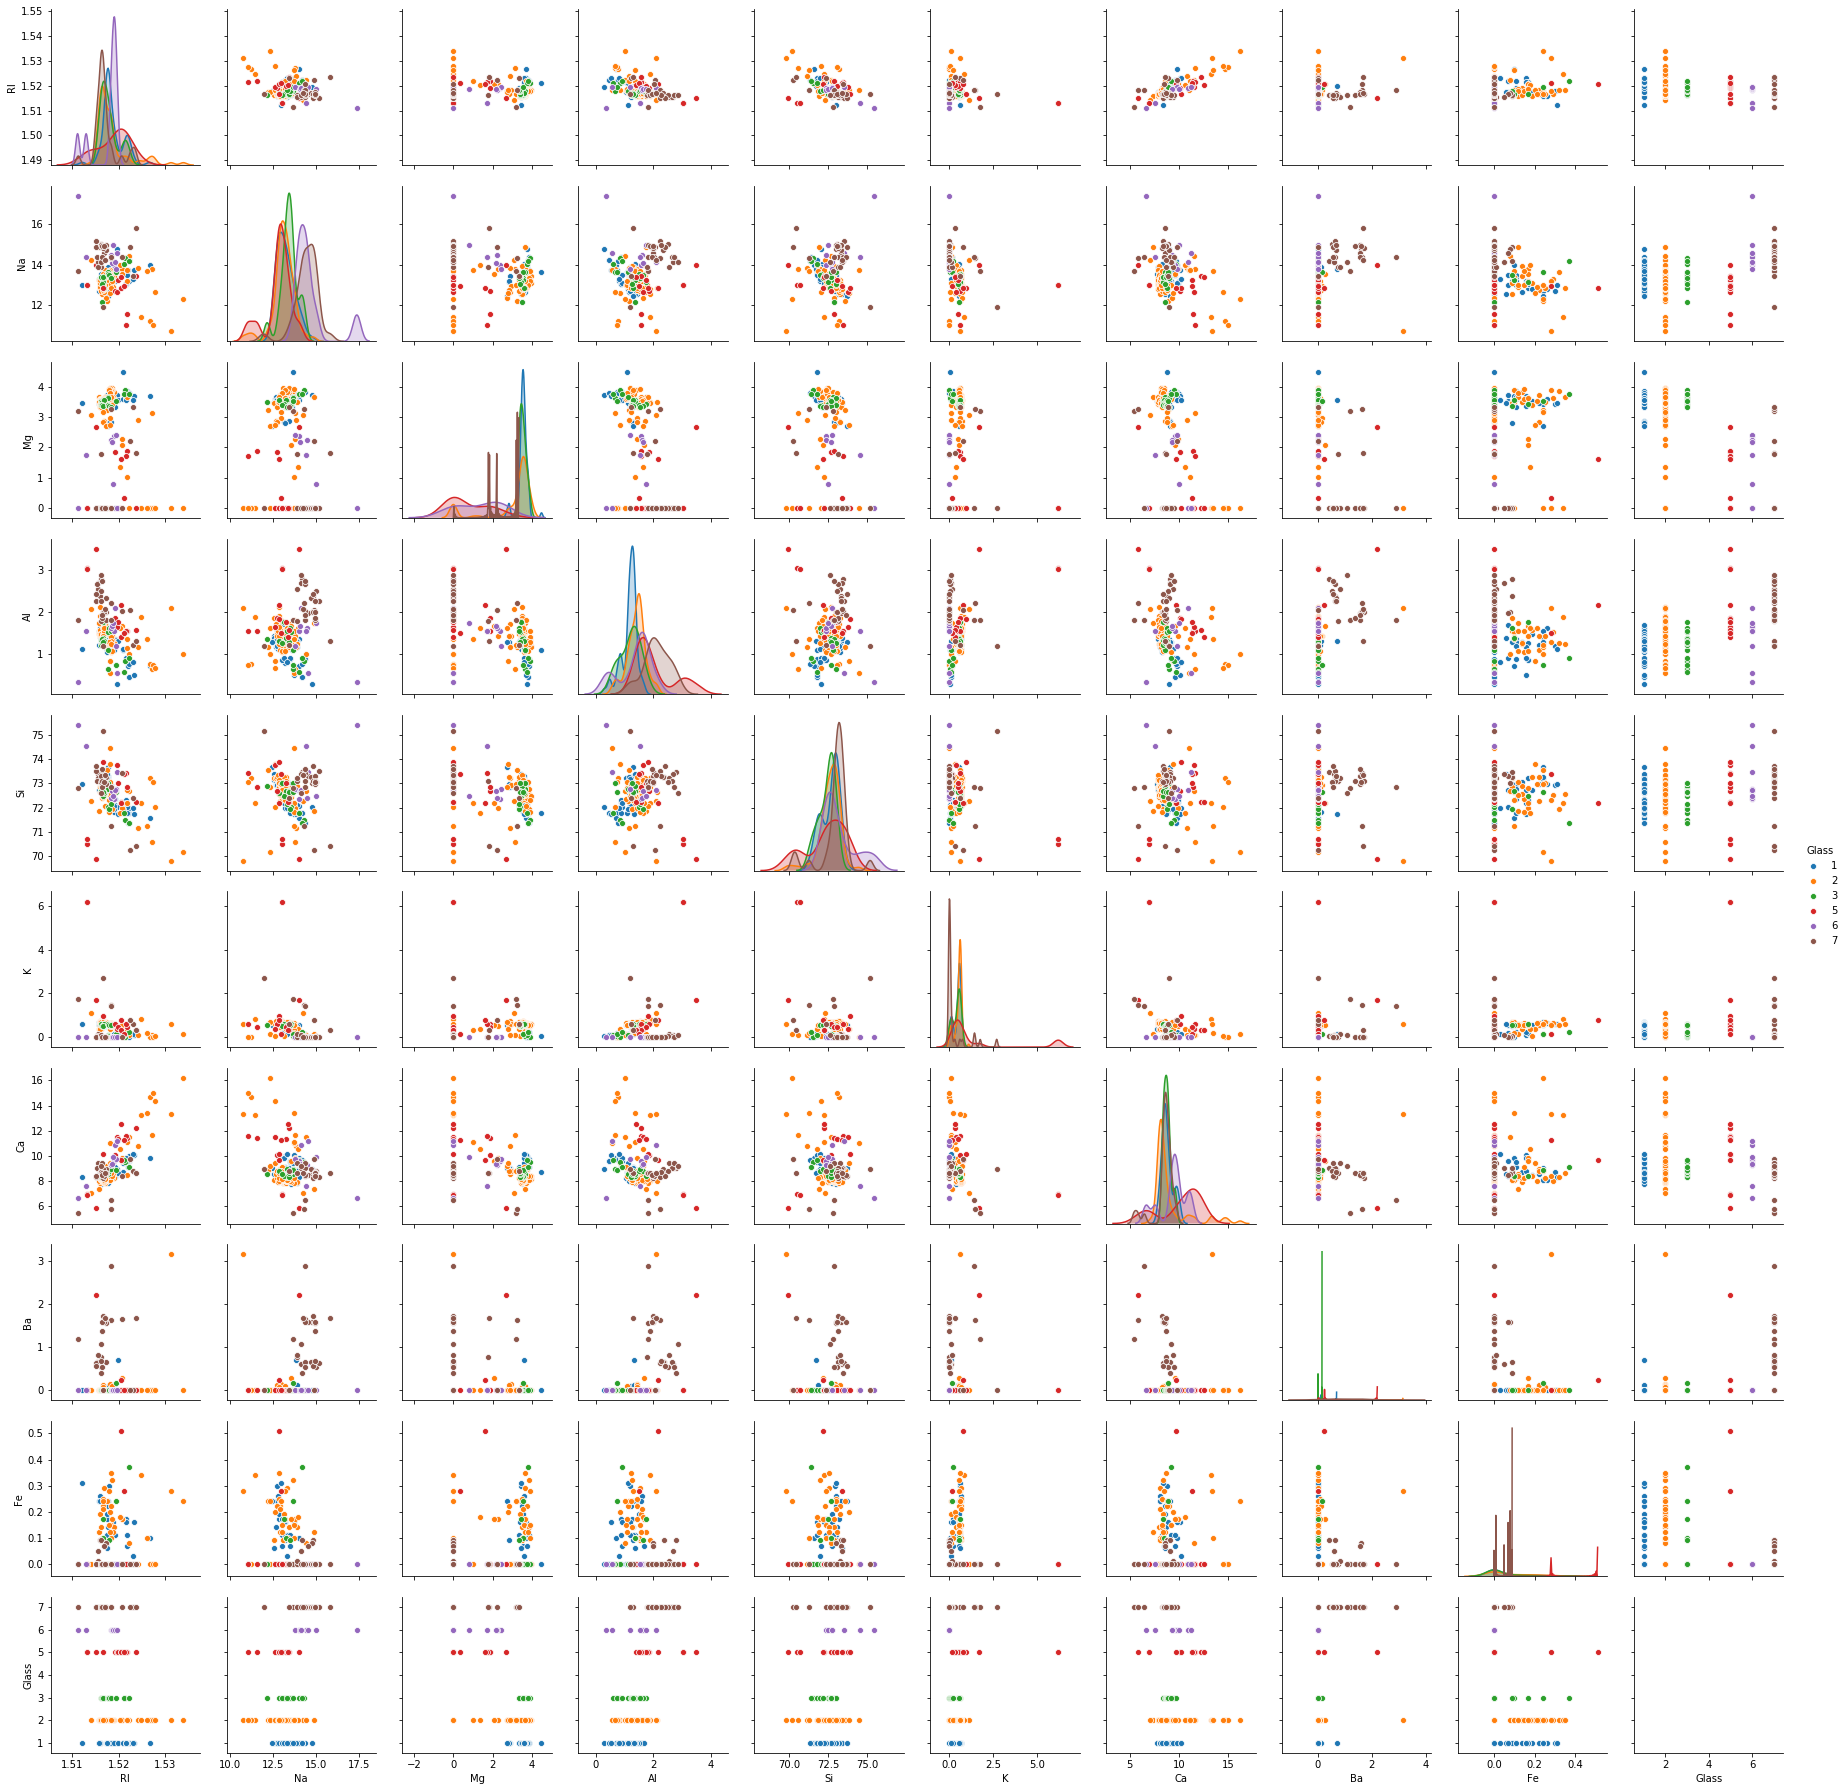

In [9]:
sns.pairplot(glass_df , diag_kind = 'kde' , hue='Glass')

In [72]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI       214 non-null float64
Na       214 non-null float64
Mg       214 non-null float64
Al       214 non-null float64
Si       214 non-null float64
K        214 non-null float64
Ca       214 non-null float64
Ba       214 non-null float64
Fe       214 non-null float64
Glass    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [73]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values
glass_df.groupby(["Glass"]).count()

# Most are not diabetic. The ratio is almost 1:2 in favor or class 0.  The model's ability to predict class 0 will 
# be better than predicting class 1. 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Glass,,,,,,,,,
1,70,70,70,70,70,70,70,70,70
2,76,76,76,76,76,76,76,76,76
3,17,17,17,17,17,17,17,17,17
5,13,13,13,13,13,13,13,13,13
6,9,9,9,9,9,9,9,9,9
7,29,29,29,29,29,29,29,29,29


In [74]:
glass_df[glass_df.isnull().any(axis=1)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass


In [75]:

glass_df_z = glass_df.apply(zscore)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000186C5C594C8>,
      dtype=object)

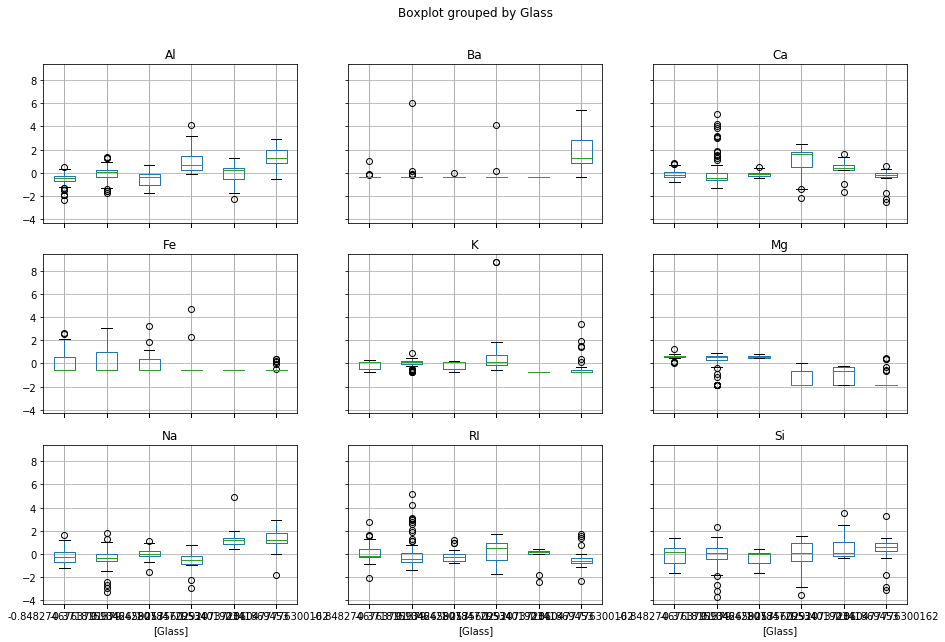

In [76]:
# Boxplot

glass_df_z.boxplot(by = 'Glass',  layout=(3,3), figsize=(15, 10))

In [77]:
y = glass_df.pop('Glass')
glass_df_z = glass_df.apply(zscore)

In [78]:
array = glass_df_z.values
X = array[:,0:8] 
Y = y  
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [79]:
X_train

array([[-0.24933347, -0.73383495,  0.59447339, ...,  0.12747538,
        -0.39931881, -0.35287683],
       [-0.48697606, -0.90567874,  0.13583231, ...,  0.35800831,
        -0.29367195, -0.35287683],
       [-0.27243761,  0.08856035,  0.73345553, ...,  0.14284424,
        -0.65287128, -0.35287683],
       ...,
       [-0.23943169, -0.52516748,  0.59447339, ...,  0.23505741,
        -0.30071507, -0.35287683],
       [-0.92595473,  0.56726807, -1.86551055, ..., -0.54875457,
         0.31907985,  1.28000276],
       [ 0.93227829, -0.53744204, -1.63619001, ..., -0.56412343,
         1.62910094, -0.35287683]])

In [90]:
NNH = KNeighborsClassifier(n_neighbors= 3)

NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [91]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.7076923076923077

In [82]:
predicted_labels

array([1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 2, 2, 1, 1, 5, 2, 5, 2, 1,
       2, 7, 2, 6, 7, 3, 1, 2, 7, 1, 2, 2, 2, 7, 1, 1, 2, 1, 1, 7, 2, 3,
       1, 7, 1, 5, 1, 1, 1, 1, 3, 1, 5, 2, 1, 1, 2, 1, 2, 1, 1, 7, 2],
      dtype=int64)

In [83]:

print(metrics.confusion_matrix(y_test, predicted_labels))


[[18  2  0  0  0  0]
 [ 9 17  2  1  0  0]
 [ 2  0  2  0  0  0]
 [ 1  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  7]]


In [84]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,50))


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

d:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
d:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
d:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
d:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
d:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less 

The optimal number of neighbors is 3


d:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
d:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
d:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
d:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


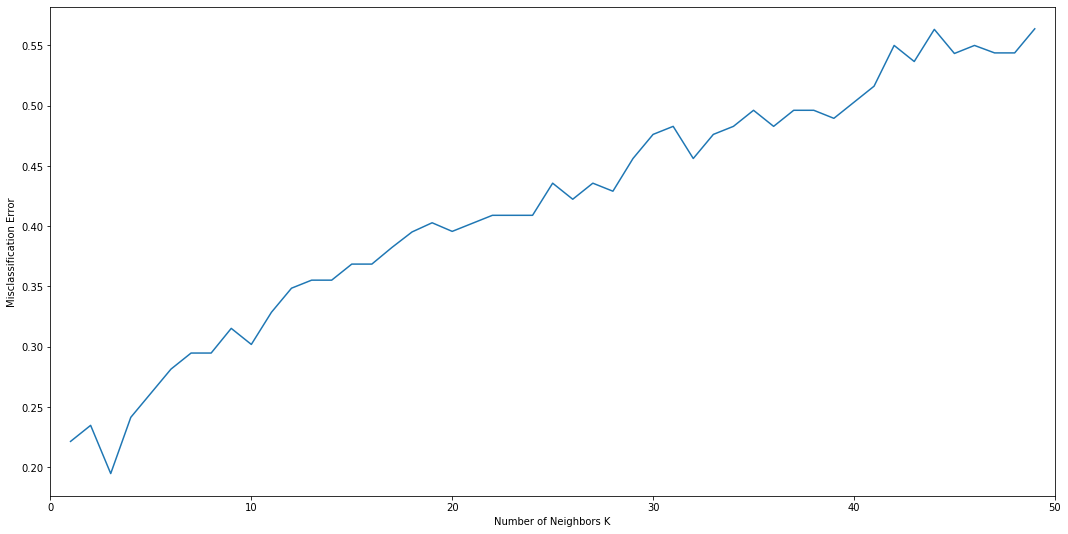

In [85]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,50)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()